In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
from scipy import linalg
%matplotlib inline
mlp.rcParams['figure.dpi']=300



In [2]:
ind = pd.read_csv("ind30.csv", header=0, index_col=0)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
ind.columns = ind.columns.str.strip() # remove first and last spaces from the attributes' name
pd.set_option("display.max_columns", None) # add this line of code to avoid some columns being omitted
print("Shape of the DataFrame is: ",ind.shape) 
ind.head(20) # As you can see, the DataFrame is structured as a time series
# 横轴return

Shape of the DataFrame is:  (1110, 30)


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,0.0207,0.0407,0.0543,0.0318,0.1639,0.0102,0.0564,0.0154,-0.0140,0.0704,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,0.0472,0.0217,0.0206,0.0210,0.0423,0.0166,0.0055,0.0085,0.0369,-0.0169,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,-0.0050,0.0015,0.0036,-0.0056,0.0483,0.0273,0.0174,0.0030,-0.0369,0.0204,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,-0.0455,-0.0385,0.0111,-0.0573,-0.0793,-0.0556,-0.0320,0.0223,-0.0104,-0.0263,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,0.0220,0.0386,0.0318,0.0508,-0.0066,0.0787,0.0846,-0.0048,0.0006,0.0371,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
1926-12,-0.0051,-0.0409,0.0255,0.0217,0.0053,0.0256,0.0060,0.0011,0.0537,0.0643,0.0352,0.0375,0.0502,-0.0247,0.1049,0.0248,0.0183,0.0143,0.0294,-0.0017,0.0199,0.0621,0.0724,-0.0463,0.0359,0.0965,0.0057,0.0151,0.0268,-0.0234
1927-01,-0.0084,0.0057,-0.0035,0.0187,0.0967,0.0408,-0.0106,0.0505,0.0023,-0.0150,-0.0189,-0.0039,0.0119,-0.0102,-0.0081,-0.0061,0.0417,-0.0306,0.0167,-0.0179,0.0188,0.0208,-0.0145,-0.0260,0.0144,-0.1793,-0.0270,0.0152,-0.0238,-0.0396
1927-02,0.0442,0.1283,0.0149,0.0164,0.0141,0.0457,0.0277,0.0171,0.0969,0.0774,0.0417,0.0367,0.0785,0.0430,0.0956,0.0460,0.0520,0.0564,0.0113,0.0453,0.0397,0.0890,0.0485,0.0546,0.0518,0.0349,0.0347,0.0686,0.0297,0.0028
1927-03,0.0209,-0.1356,0.0551,0.0102,-0.0028,-0.0008,0.0090,0.0101,0.0607,-0.0539,0.0346,0.0148,-0.0224,0.0040,0.0156,-0.0176,0.0444,0.0545,-0.0701,0.0037,0.0556,-0.0780,0.0429,-0.0967,0.0106,-0.2047,-0.0030,-0.0242,0.0136,0.0218
1927-04,0.0272,0.0285,0.0401,-0.0377,-0.0096,0.0144,0.0595,0.0274,0.0295,0.0054,-0.0095,-0.0034,0.0182,0.0629,0.0291,-0.0075,0.0302,0.0095,-0.0578,0.0171,-0.0213,0.0344,0.0310,0.0493,0.0074,-0.1075,0.0438,0.0656,0.0289,0.0527


## Expected Returns and the Covariance Matrix
Generating the efficient frontier requires a set of expected returns and a covariance matrix. For now, let's assume that we can estiamte these simply by looking back in time and naively assuming they will hold in the future. Clearly, they will not, but we will have plenty of time to dig into that in future lectures. For the moment, assume that our naive method of estimating these parameters will suffice.

We can generate an estimation of expected returns using the annualize_rets() function, that returns a vector of expected returns. For instance, let's generate the set of expected returns based on historic returns from the 5 year period from 1996 through 2000:

In [3]:
# computes the annualized rate of return using the compounded growth rate formula: 
# (1+r)^(periods_per_year/n_periods) -1, 
# where n_periods is the number of observations in the returns data. 
# It's an annualized version of the returns of a security or a portfolio, 
# it helps to compare the returns to different periods.
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1
# computes the annualized volatility of returns by taking the standard deviation of the returns data 
# and scaling it by the square root of the number of periods per year
def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)
# It compute the annualized excess return over the risk-free rate and 
# then divide it by the annualized volatility. This helps to compare different investments or portfolios 
# by comparing the excess return generated per unit of volatility or risk.
def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    夏普比率 单位风险获得的收益率"""
    
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

In [4]:
er = annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()
print(er)

Food     0.116799
Beer     0.141126
Smoke    0.107830
Games    0.068212
Books    0.187286
Hshld    0.134766
Clths    0.079160
Hlth     0.246641
Chems    0.077456
Txtls   -0.042721
Cnstr    0.084076
Steel    0.115809
FabPr    0.108280
ElcEq    0.272420
Autos    0.080954
Carry    0.173904
Mines   -0.053554
Coal     0.414689
Oil      0.165377
Util     0.145903
Telcm    0.122771
Servs    0.175264
BusEq    0.271952
Paper    0.097163
Trans    0.071099
Whlsl    0.126431
Rtail    0.207247
Meals    0.067400
Fin      0.223371
Other    0.043349
dtype: float64


In [5]:
ind['1996':'2000']

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1996-01,0.0342,0.0326,0.0182,0.0469,-0.0049,0.0285,-0.0236,0.0595,0.0543,-0.0392,0.0248,0.0381,0.0203,0.0530,0.0309,0.0066,0.1488,-0.0234,-0.0037,0.0191,0.0233,0.0143,0.0215,0.0121,-0.0012,-0.0065,-0.0146,0.0657,0.0393,0.0283
1996-02,0.0162,0.0561,0.0318,0.0179,0.0233,-0.0044,0.0187,-0.0107,0.0276,0.0024,-0.0074,-0.0065,0.0381,-0.0076,0.0175,0.0312,0.0271,0.0182,0.0105,-0.0258,-0.0220,0.0423,0.0677,-0.0104,0.0418,0.0294,0.0553,0.0342,0.0213,0.0151
1996-03,-0.0382,0.0190,-0.0768,0.0108,0.0027,0.0130,0.1149,0.0024,0.0588,0.0268,0.0117,0.0543,0.0175,0.0302,0.0587,0.0375,-0.0040,0.0453,0.0498,-0.0047,-0.0187,0.0157,-0.0460,0.0306,0.0326,0.0243,0.0825,0.0083,0.0096,0.0500
1996-04,-0.0032,-0.0089,-0.0160,0.0237,0.0285,0.0388,0.0541,-0.0060,-0.0087,0.0346,0.0293,0.0192,0.0374,0.0038,0.0299,0.0114,0.0108,0.0064,0.0345,-0.0259,0.0270,0.0820,0.1056,0.0274,0.0265,0.0468,0.0436,0.0271,-0.0108,0.0269
1996-05,0.0550,0.0969,0.0548,0.0279,0.0349,0.0325,0.0805,0.0393,-0.0037,0.0577,0.0305,-0.0005,0.0128,0.0618,0.0138,0.0258,0.0286,0.1573,0.0044,0.0135,0.0006,0.0352,0.0418,0.0144,-0.0028,0.0383,0.0511,0.0041,0.0141,0.0432
1996-06,0.0238,0.0654,0.0368,-0.0259,-0.0046,0.0122,0.0012,-0.0019,-0.0235,0.0098,0.0068,-0.0559,-0.0452,0.0315,-0.0527,0.0095,-0.1105,0.0935,0.0091,0.0521,0.0043,-0.0090,-0.0635,-0.0133,-0.0143,-0.0396,-0.0108,-0.0051,0.0065,-0.0126
1996-07,-0.0245,-0.0578,0.0020,-0.1182,-0.0700,-0.0332,-0.0433,-0.0606,-0.0301,-0.0359,-0.0514,-0.0571,-0.0821,-0.0476,-0.0392,-0.0120,-0.0286,-0.0838,-0.0466,-0.0582,-0.0854,-0.0779,-0.0750,-0.0188,-0.0717,-0.0771,-0.0762,-0.0766,-0.0258,-0.0696
1996-08,-0.0040,0.0214,-0.1318,0.0030,0.0363,0.0169,0.0577,0.0419,0.0371,0.0357,0.0326,0.0578,0.0471,0.0165,0.0329,0.0409,0.0312,0.0116,0.0297,0.0289,-0.0092,0.0305,0.0507,0.0398,0.0311,0.0381,0.0689,0.0355,0.0418,0.0512
1996-09,0.0876,0.0073,0.0141,0.0743,0.0232,0.0634,0.0715,0.0734,0.0592,-0.0001,0.0555,0.0196,0.0624,0.1001,0.0107,0.0518,-0.0371,0.1033,0.0399,0.0067,0.0152,0.0864,0.1063,0.0463,0.0162,0.0470,0.0329,0.0035,0.0578,0.0510
1996-10,0.0255,0.0078,0.0331,-0.0169,0.0047,0.0105,-0.0025,-0.0068,0.0147,-0.0127,0.0146,-0.0080,-0.0137,0.0571,0.0025,0.0259,-0.0125,0.0103,0.0585,0.0361,-0.0073,-0.0199,-0.0126,0.0277,0.0210,0.0015,-0.0196,-0.0394,0.0547,0.0047


In [6]:
def portfolio_return(weights, returns):
    """
    Computes the return on a portfolio from constituent returns and weights
    weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
    """
    return weights.T @ returns
#  The function calculates the return of the portfolio by taking the dot product (matrix multiplication) 
# of the weights and returns. This is equivalent to taking the weighted average of the returns, 
# where the weights represent the proportion of the portfolio allocated to each asset.

def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5
# The function calculates the volatility of the portfolio by taking the dot product of the weights, 
# the covariance matrix and the transpose of the weights. 
# The volatility is the standard deviation of the portfolio returns, 
# it describes the degree of variability of returns.

# matrix multiplication: represented by the operator @ in Python.

# It's worth mentioning that the portfolio return and volatility are key measures 
# for the overall performance of the portfolio. 
# Portfolio return describes the expected return of the portfolio, 
# and portfolio volatility describes the risk of the portfolio. 
# And the trade-off between risk and return is a fundamental concept in portfolio management.

## Simulation

### Two asset case

In [7]:
def sim_ef2(n_points, er, cov):
    """
    Simulates the 2-asset portfolio returns and volatility
    """
    if er.shape[0] != 2 or er.shape[0] != 2:
        raise ValueError("plot_ef2 can only plot 2-asset frontiers")
    weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]#有两个资产，一个w另一个就是1-w
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    plt.figure()
    ef.plot.line(x="Volatility", y="Returns", style=".-", xlim=[min(vols)*0.9,max(vols)*1.1])
    


'''The efficient frontier is a concept in portfolio management,
it represents a set of portfolios that offer the highest expected return for a given level of risk or the lowest risk 
for a given level of expected return. This function helps to visualize the efficient frontier of a 2-asset portfolio 
by showing the trade-off between expected return and volatility.'''

'The efficient frontier is a concept in portfolio management,\nit represents a set of portfolios that offer the highest expected return for a given level of risk or the lowest risk \nfor a given level of expected return. This function helps to visualize the efficient frontier of a 2-asset portfolio \nby showing the trade-off between expected return and volatility.'

<Figure size 1800x1200 with 0 Axes>

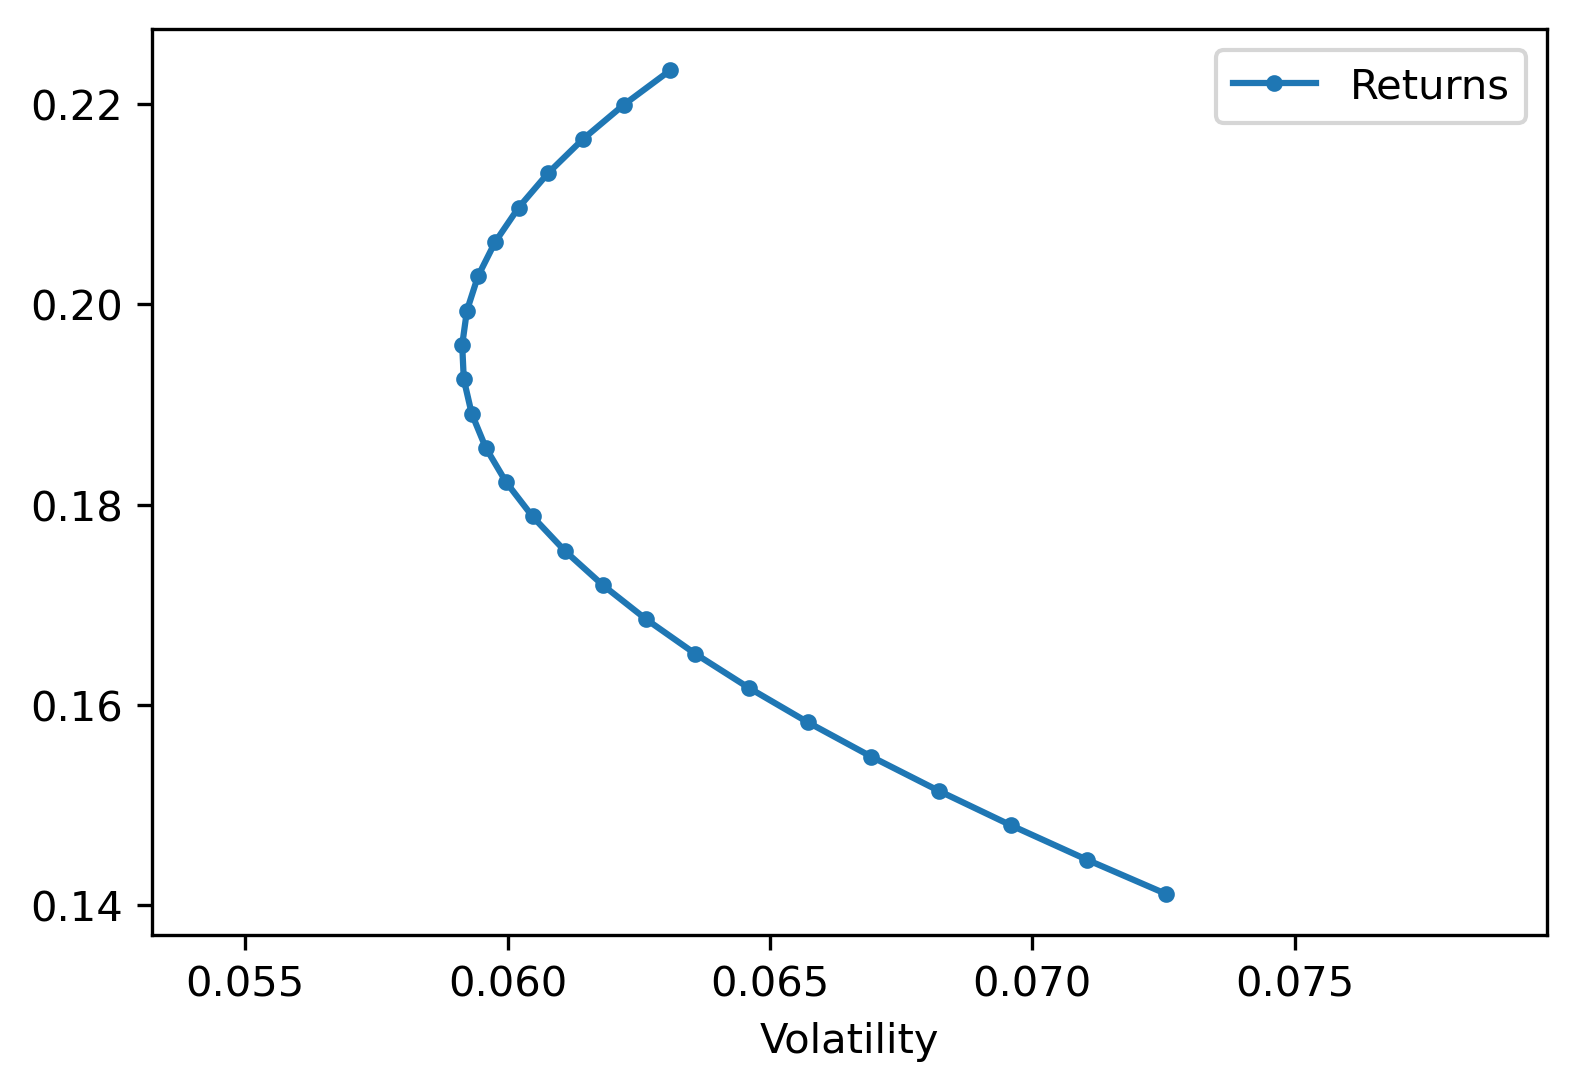

In [8]:
l = ["Fin", "Beer"]
sim_ef2(25, er[l].values, cov.loc[l,l])

### Multiple Assets Simulation (Required)

In [9]:
#‘fin’+‘bear’再加一个
# 行业跨度大，分散风险
# 相关系数低

### Replace with equity and bond ETFs (Required)

### Discussion (Required)
Simulate for several different settings, e.g. different compositions of assets, and report the changing trend of the efficient frontier. State your observations and analysis in the report with the help of reasonable visualizations. For example, once you observe a forward shift in the effective frontier after adding / changing a new asset, try to figure out the underlying reasons.

### Optimization (Bonus Question)

Using Mean-Variance Optimization approach to achieve the efficient frontier (minimize standard deviation given each expected return level) by changing weights of your assets. 

You need three or more than three asset inputs for this question.

Then draw the efficient frontier.

In [10]:
from scipy.optimize import minimize

# Define a list of expected return levels
expected_returns = np.linspace(er.min(), er.max(), 50)

# Initialize an empty list to store the optimized weights for each expected return level
optimal_weights = []

# Define the optimization function
def optimize_portfolio(weights, returns, cov_matrix, target_return):
    portfolio_return_val = portfolio_return(weights, returns)
    portfolio_vol_val = portfolio_vol(weights, cov_matrix)
    return (target_return - portfolio_return_val) / portfolio_vol_val

In [11]:
# Loop through each expected return level
for target_return in expected_returns:
    n_assets = er.shape[0]
    # Initialize the starting weights as equal weights
    initial_weights = np.ones(n_assets) / n_assets
    # Constrain the weights to sum up to 1
    bounds = [(0,1) for i in range(n_assets)]
    # Minimize the optimization function
    opt_results = minimize(optimize_portfolio, initial_weights, args=(er, cov, target_return),
                           bounds=bounds, method='SLSQP', options={'disp': False})
    # Append the optimized weights to the list
    optimal_weights.append(opt_results.x)
    

<ipython-input-10-c594acf35463>:13: RuntimeWarning: divide by zero encountered in double_scalars
  return (target_return - portfolio_return_val) / portfolio_vol_val


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

<Figure size 1800x1200 with 0 Axes>

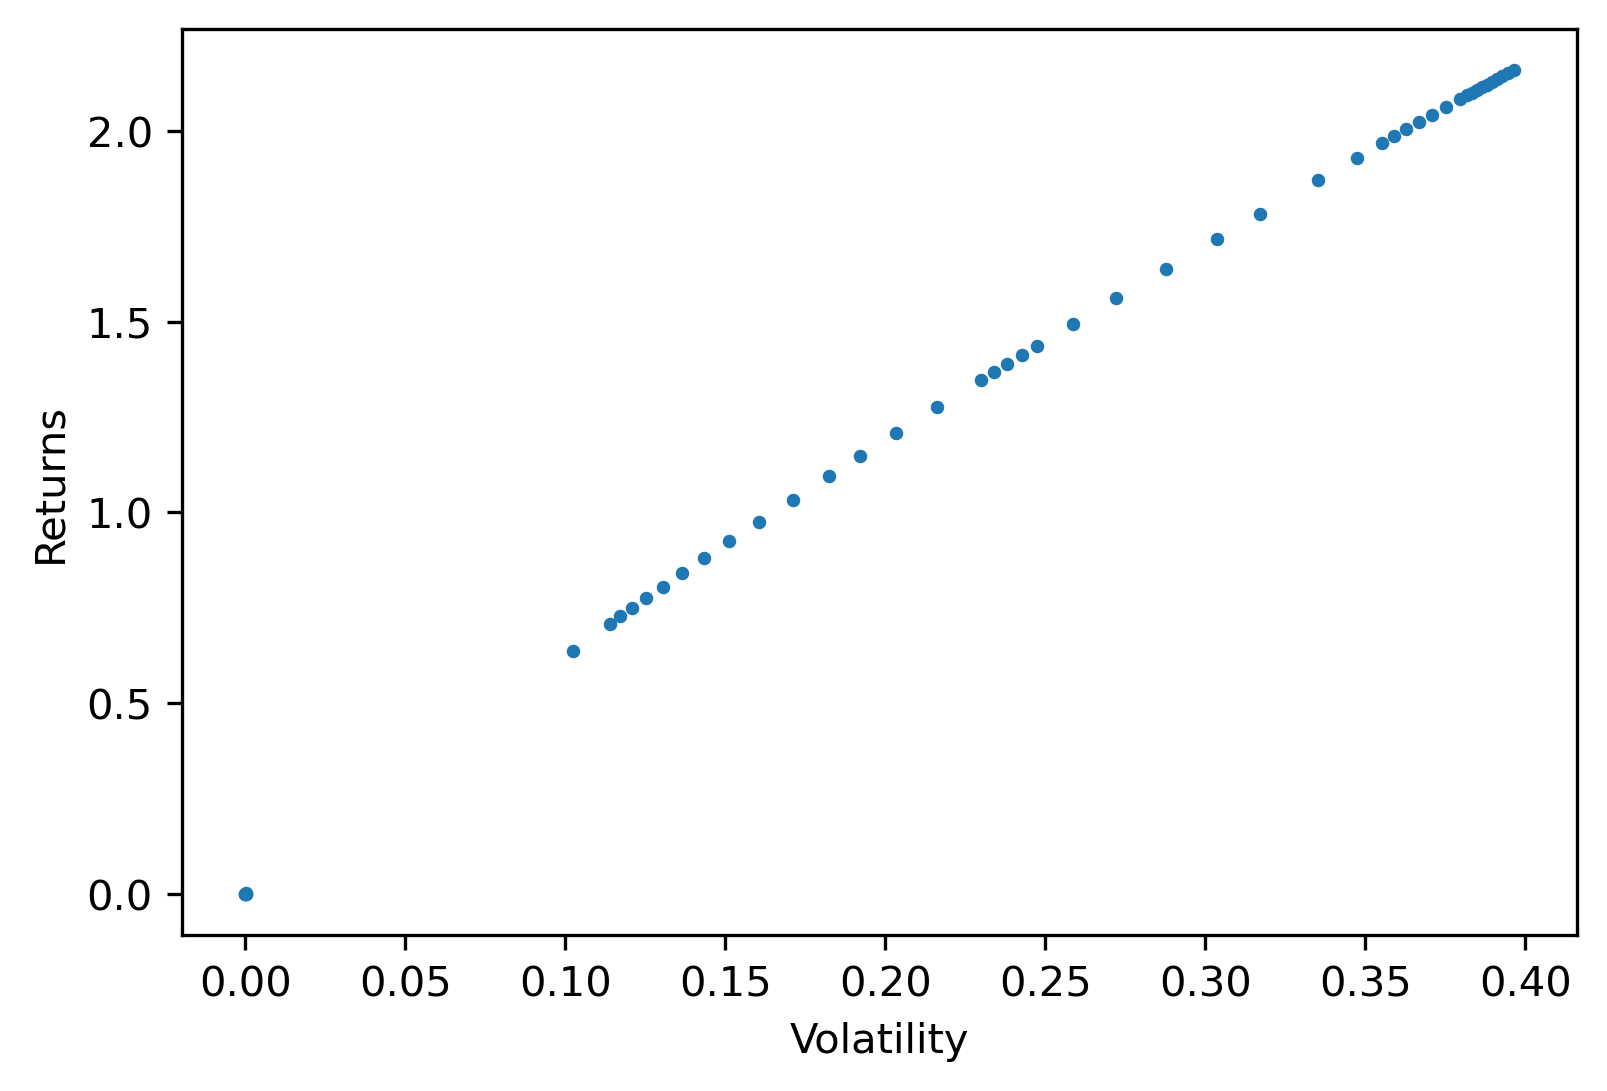

In [12]:
# Calculate the returns and volatilities for the optimized portfolios
optimal_returns = [portfolio_return(w, er) for w in optimal_weights]
optimal_volatilities = [portfolio_vol(w, cov) for w in optimal_weights]

optimal = pd.DataFrame({
    "Returns":optimal_returns,
    "Volatility":optimal_volatilities})

# Plot the efficient frontier
plt.figure()
optimal.plot.scatter(x="Volatility", y="Returns", s=5)

In [14]:
data=ind[["Fin", "Beer", "Oil"]]

In [16]:
data.head(100)

,Fin,Beer,Oil
1926-07,0.0037,-0.0519,-0.0140
1926-08,0.0446,0.2703,0.0369
1926-09,-0.0123,0.0402,-0.0369
1926-10,-0.0516,-0.0331,-0.0104
1926-11,0.0224,0.0729,0.0006
...,...,...,...
1934-06,0.0508,-0.0282,0.0116
1934-07,-0.1477,-0.2435,-0.0944
1934-08,0.0565,0.1428,0.0608
1934-09,-0.0240,-0.0176,-0.0244


In [30]:
train_set = data[data.index>'2015-12']

In [31]:
train_set.head(100)

,Fin,Beer,Oil
2016-01,-0.0962,-0.0022,-0.0463
2016-02,-0.0283,-0.0232,-0.0298
2016-03,0.0667,0.0563,0.1085
2016-04,0.0397,0.0032,0.0908
2016-05,0.0216,-0.0090,-0.0093
2016-06,-0.0529,0.0533,0.0266
2016-07,0.0405,0.0184,-0.0288
2016-08,0.0490,-0.0088,0.0141
2016-09,-0.0141,0.0165,0.0294
2016-10,0.0142,-0.0163,-0.0290


In [32]:
class MeanVariance:
    #传入收益率数据
    def __init__(self,returns):
        self.returns = returns
    #定义最小化方差函数，即求解二次规划
    def minVar(self,goalRet):
        covs = np.array(self.returns.cov())
        means = np.array(self.returns.mean())
        L1 = np.append(np.append(covs.swapaxes(0,1),[means],0),
                      [np.ones(len(means))],0).swapaxes(0,1)
        L2 = list(np.ones(len(means)))
        L2.extend([0,0])
        L3 = list(means)
        L3.extend([0,0])
        L4 = np.array([L2,L3])
        L = np.append(L1,L4,0)
        results = linalg.solve(L,np.append(np.zeros(len(means)),[1,goalRet],0))
        return np.array([list(self.returns.columns),results[:-2]])
    #定义绘制最小方差前缘曲线函数
    def frontierCurve(self):
        goals = [x/500000 for x in range(-100,4000)]
        variances = list(map(lambda x: self.calVar(self.minVar(x)[1,:].astype(np.float)),goals))
        plt.plot(variances,goals)
    #定义各资产比例，计算收益率均值
    def meanRet(self,fracs):
        meanRisky = ffn.to_returns(self.returns).mean()
        #assert (len(meanRisky == len(fracs),'Length of fractions must be equal to number of assets')
        return np.sum(np.multiply(meanRisky,np.array(fracs)))
    #定义各资产比例，计算收益率方差
    def calVar(self,fracs):
        return np.dot(np.dot(fracs,self.returns.cov()),fracs)

<ipython-input-32-0fc7b8fbc071>:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  variances = list(map(lambda x: self.calVar(self.minVar(x)[1,:].astype(np.float)),goals))


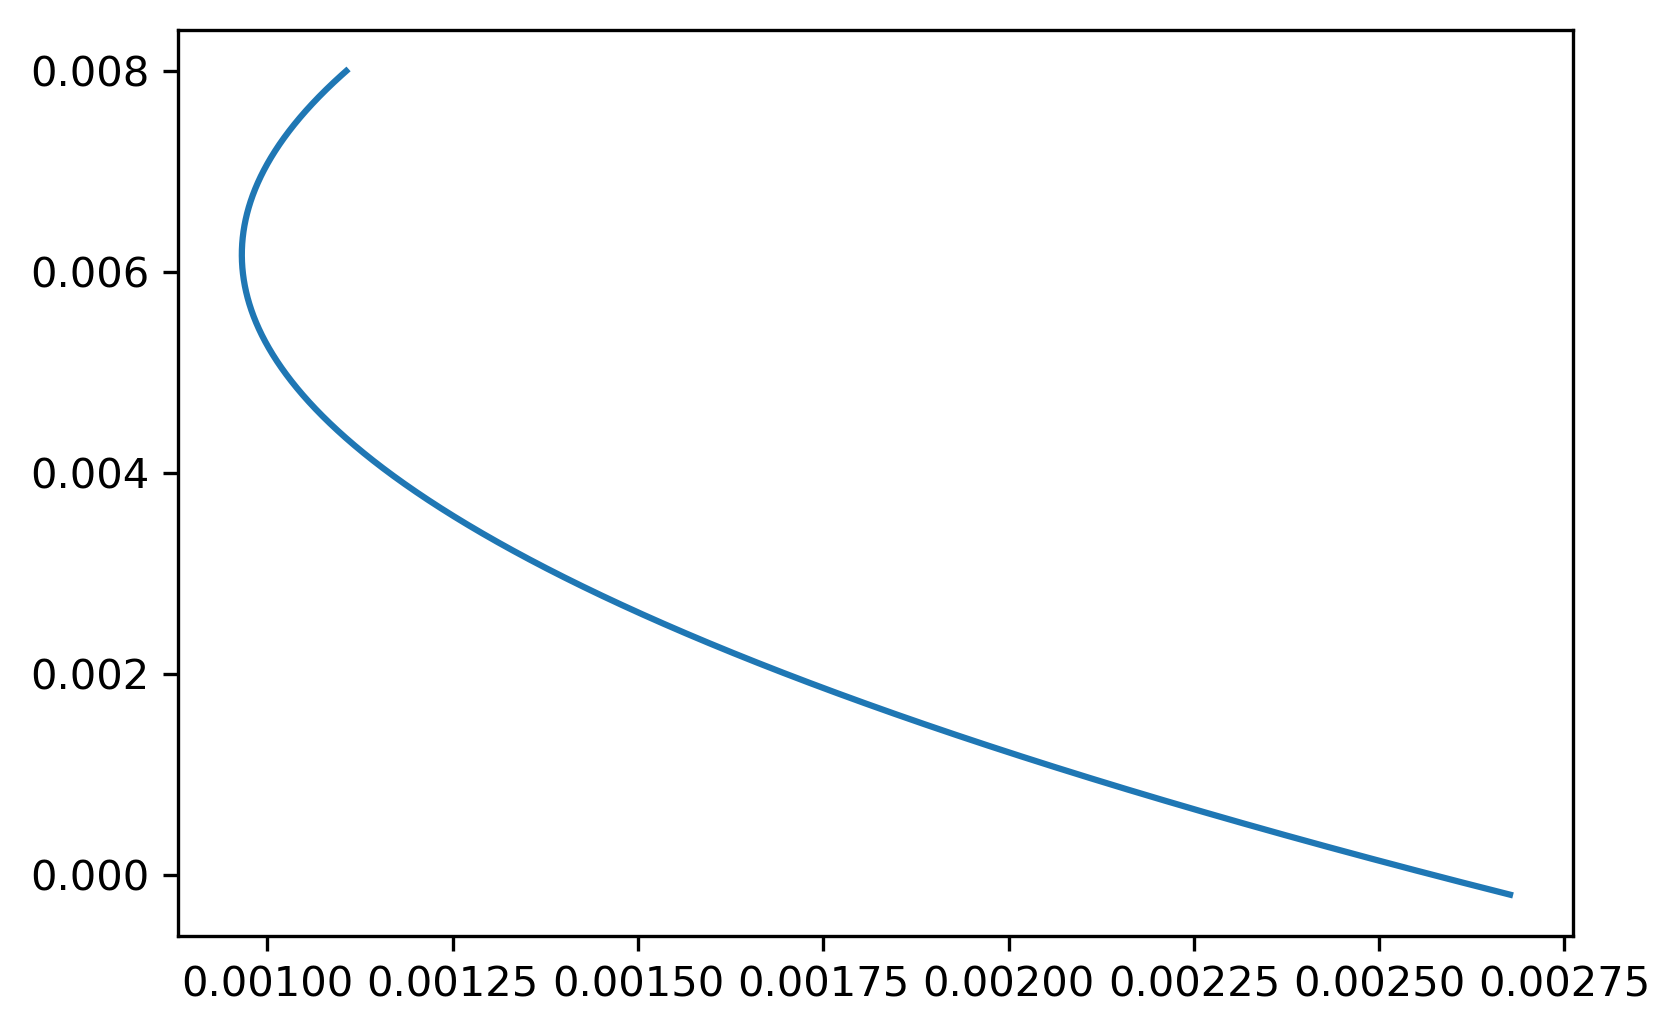

In [33]:
minVar = MeanVariance(train_set)
minVar.frontierCurve()